In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import seaborn as sns
import scipy
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
merged_data = pd.read_csv('/Users/munisabakhromova/Desktop/research/merged_data.csv')

merged_data.head()

/var/folders/f8/xf4k31p91fq6xlyklv8cjx3m0000gn/T/ipykernel_15399/3831768791.py:1: DtypeWarning: Columns (16,62,65,67,68,70,71,74,78,79,80,81,82,83,85,87,89,90,93,95,96,98,100,101,102,103,104,108,109,110,111,112,113,114,115,116,117,119,120,124,125,128,130,136,137,138,141,143,146,147,148,153,158,162,164,165,167,169,170,172,173,174,177,183,185,186,187,188,189,190,191,192,193,194,197,199,200,201,202,203,204,205,207,208,209,210,212,213,214,215,217,220,221,223,225,230,231,232,236,238,239,240,241,244,245,246,247,251,253,255,259,260,261,262,264,266,267,271,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,353,354,355,356,358,365,367,369,370,371,372,373,374,376,377,378,379,380,381,382,383,385,386,388,394,395,396,397,398,399,400,405,406,412,413,414,415,416,417,418,4

,country,isocode,ison,region,language,date,id_gallup,wgt_x,patience,risktaking,...,WP9701,WP9702,WP9704,WP98,WP9811,WP9896,WP99,WP9903,YEAR_CALENDAR,YEAR_WAVE
0,Turkey,TUR,792.0000,Adana,Turkish,2012-03-07,7100800000001.0000,0.2718,0.0472,1.0202,...,NaN,NaN,NaN,Satisfied,NaN,NaN,Satisfied,NaN,2012,2012
1,Turkey,TUR,792.0000,Adana,Turkish,2012-03-08,7100800000002.0000,0.2718,-0.6757,0.3872,...,NaN,NaN,NaN,Satisfied,NaN,NaN,Satisfied,NaN,2012,2012
2,Turkey,TUR,792.0000,Adana,Turkish,2012-03-08,7100800000003.0000,0.4423,0.3183,1.0202,...,NaN,NaN,NaN,Satisfied,NaN,NaN,Satisfied,NaN,2012,2012
3,Turkey,TUR,792.0000,Adana,Turkish,2012-03-07,7100800000004.0000,1.4237,0.4990,1.2715,...,NaN,NaN,NaN,Satisfied,NaN,NaN,Satisfied,NaN,2012,2012
4,Turkey,TUR,792.0000,Adana,Turkish,2012-03-07,7100800000005.0000,0.7054,0.5893,1.1226,...,NaN,NaN,NaN,Satisfied,NaN,NaN,Satisfied,NaN,2012,2012


In [3]:
female_data = merged_data[merged_data['gender'] == 1][['country', 'patience']]

print("Female Data:")
female_data


Female Data:


,country,patience
0,Turkey,0.0472
1,Turkey,-0.6757
2,Turkey,0.3183
6,Turkey,-0.6757
11,Turkey,-0.6757
...,...,...
80329,Egypt,-0.9308
80330,Egypt,-0.6757
80331,Egypt,-0.4206
80332,Egypt,-0.6757


In [4]:
female_means = female_data.groupby('country')['patience'].mean().reset_index()
female_means

,country,patience
0,Afghanistan,-0.1233
1,Algeria,0.0220
2,Argentina,-0.2972
3,Australia,0.6223
4,Austria,0.4232
...,...,...
71,United Kingdom,0.3969
72,United States,0.8359
73,Venezuela,-0.2676
74,Vietnam,0.1346


In [5]:
male_data = merged_data[merged_data['gender'] == 0][['country', 'patience']]

print("Male Data:")
male_data

Male Data:


,country,patience
3,Turkey,0.4990
4,Turkey,0.5893
5,Turkey,-0.5853
7,Turkey,-0.6138
8,Turkey,0.3023
...,...,...
80324,Egypt,-0.8032
80325,Egypt,-0.6757
80333,Egypt,-0.5482
80335,Egypt,-1.3134


In [6]:
male_means = male_data.groupby('country')['patience'].mean().reset_index()
male_means

,country,patience
0,Afghanistan,-0.2904
1,Algeria,0.0866
2,Argentina,-0.1798
3,Australia,0.8211
4,Austria,0.7654
...,...,...
71,United Kingdom,0.7192
72,United States,0.8983
73,Venezuela,-0.2306
74,Vietnam,0.0851


In [7]:
male_means_rank = pd.DataFrame(male_means[['country']])
male_means_rank['patience_rank'] = male_means['patience'].rank(ascending=False)

print("Country and Ranks of Patience for Each Country in Male Data:")
print(male_means_rank[['country', 'patience_rank']])

Country and Ranks of Patience for Each Country in Male Data:
           country  patience_rank
0      Afghanistan        61.0000
1          Algeria        26.0000
2        Argentina        51.0000
3        Australia         6.0000
4          Austria         8.0000
..             ...            ...
71  United Kingdom         9.0000
72   United States         4.0000
73       Venezuela        54.0000
74         Vietnam        27.0000
75        Zimbabwe        48.0000

[76 rows x 2 columns]


In [8]:
female_means_rank = pd.DataFrame(female_means[['country']])
female_means_rank['patience_rank'] = female_means['patience'].rank(ascending=False)

print("Country and Ranks of Patience for Each Country in Female Data:")
print(female_means_rank[['country', 'patience_rank']])

Country and Ranks of Patience for Each Country in Female Data:
           country  patience_rank
0      Afghanistan        40.0000
1          Algeria        28.0000
2        Argentina        60.0000
3        Australia         5.0000
4          Austria        10.0000
..             ...            ...
71  United Kingdom        11.0000
72   United States         3.0000
73       Venezuela        55.0000
74         Vietnam        21.0000
75        Zimbabwe        56.0000

[76 rows x 2 columns]


In [9]:
corr_gender=male_means_rank['patience_rank'].corr(female_means_rank['patience_rank'])
corr_gender


0.9554887218045113

In [10]:
combined_ranks = pd.merge(female_means_rank, male_means_rank, on='country')
combined_ranks = combined_ranks.rename(columns={'patience_rank_x': 'patience_rank_female','patience_rank_y': 'patience_rank_male'})

combined_ranks


,country,patience_rank_female,patience_rank_male
0,Afghanistan,40.0000,61.0000
1,Algeria,28.0000,26.0000
2,Argentina,60.0000,51.0000
3,Australia,5.0000,6.0000
4,Austria,10.0000,8.0000
...,...,...,...
71,United Kingdom,11.0000,9.0000
72,United States,3.0000,4.0000
73,Venezuela,55.0000,54.0000
74,Vietnam,21.0000,27.0000


In [11]:
combined=pd.merge(male_means,female_means,on='country')
combined = combined.rename(columns={'patience_x': 'patience_male', 'patience_y': 'patience_female'})
combined

,country,patience_male,patience_female
0,Afghanistan,-0.2904,-0.1233
1,Algeria,0.0866,0.0220
2,Argentina,-0.1798,-0.2972
3,Australia,0.8211,0.6223
4,Austria,0.7654,0.4232
...,...,...,...
71,United Kingdom,0.7192,0.3969
72,United States,0.8983,0.8359
73,Venezuela,-0.2306,-0.2676
74,Vietnam,0.0851,0.1346


In [12]:
country=pd.read_stata('/Users/munisabakhromova/Desktop/research/GPS_Dataset/GPS_dataset_country_level/country_v11.dta')
country

,country,isocode,patience,risktaking,posrecip,negrecip,altruism,trust
0,Afghanistan,AFG,-0.2014,0.1208,0.2896,0.2547,0.1665,0.3160
1,Algeria,DZA,0.0598,0.3915,-0.5983,0.2549,-0.0100,-0.1774
2,Argentina,ARG,-0.2293,0.0415,0.1597,-0.1405,0.0273,-0.2067
3,Australia,AUS,0.6570,0.1371,0.0697,0.0222,0.1553,0.2990
4,Austria,AUT,0.6083,-0.0618,0.1610,-0.0554,-0.0354,0.1546
...,...,...,...,...,...,...,...,...
71,United Kingdom,GBR,0.5350,0.0487,-0.0383,0.0246,0.0285,0.2347
72,United States,USA,0.8113,0.1166,0.2037,0.0116,0.4064,0.1504
73,Venezuela,VEN,-0.2271,0.2495,0.0478,-0.2039,0.0804,0.1150
74,Vietnam,VNM,0.1105,-0.0087,-0.2656,-0.1401,-0.1589,0.1436


In [13]:
combined = pd.merge(combined, country[['country', 'patience']], on='country')
combined


,country,patience_male,patience_female,patience
0,Afghanistan,-0.2904,-0.1233,-0.2014
1,Algeria,0.0866,0.0220,0.0598
2,Argentina,-0.1798,-0.2972,-0.2293
3,Australia,0.8211,0.6223,0.6570
4,Austria,0.7654,0.4232,0.6083
...,...,...,...,...
71,United Kingdom,0.7192,0.3969,0.5350
72,United States,0.8983,0.8359,0.8113
73,Venezuela,-0.2306,-0.2676,-0.2271
74,Vietnam,0.0851,0.1346,0.1105


In [14]:
combined_ranks['patience_rank'] = combined['patience'].rank(ascending=True)
combined_ranks

,country,patience_rank_female,patience_rank_male,patience_rank
0,Afghanistan,40.0000,61.0000,27.0000
1,Algeria,28.0000,26.0000,49.0000
2,Argentina,60.0000,51.0000,25.0000
3,Australia,5.0000,6.0000,71.0000
4,Austria,10.0000,8.0000,69.0000
...,...,...,...,...
71,United Kingdom,11.0000,9.0000,67.0000
72,United States,3.0000,4.0000,74.0000
73,Venezuela,55.0000,54.0000,26.0000
74,Vietnam,21.0000,27.0000,57.0000


In [15]:
combined['mean'] = (combined['patience_male'] + combined['patience_female']) / 2
combined = combined.sort_values(by='patience').reset_index(drop=True)
combined


,country,patience_male,patience_female,patience,mean
0,Nicaragua,-0.6111,-0.6287,-0.6125,-0.6199
1,Rwanda,-0.6058,-0.6432,-0.6060,-0.6245
2,Georgia,-0.4607,-0.5349,-0.4854,-0.4978
3,Hungary,-0.3837,-0.5578,-0.4309,-0.4707
4,Cameroon,-0.3872,-0.4283,-0.4275,-0.4078
...,...,...,...,...,...
71,Switzerland,0.8132,0.4755,0.6697,0.6443
72,Canada,0.9312,0.6662,0.7185,0.7987
73,United States,0.8983,0.8359,0.8113,0.8671
74,Netherlands,1.2600,0.9055,0.9517,1.0827


In [16]:
count = len(combined[combined['patience_male'] > combined['patience_female']])
count


56

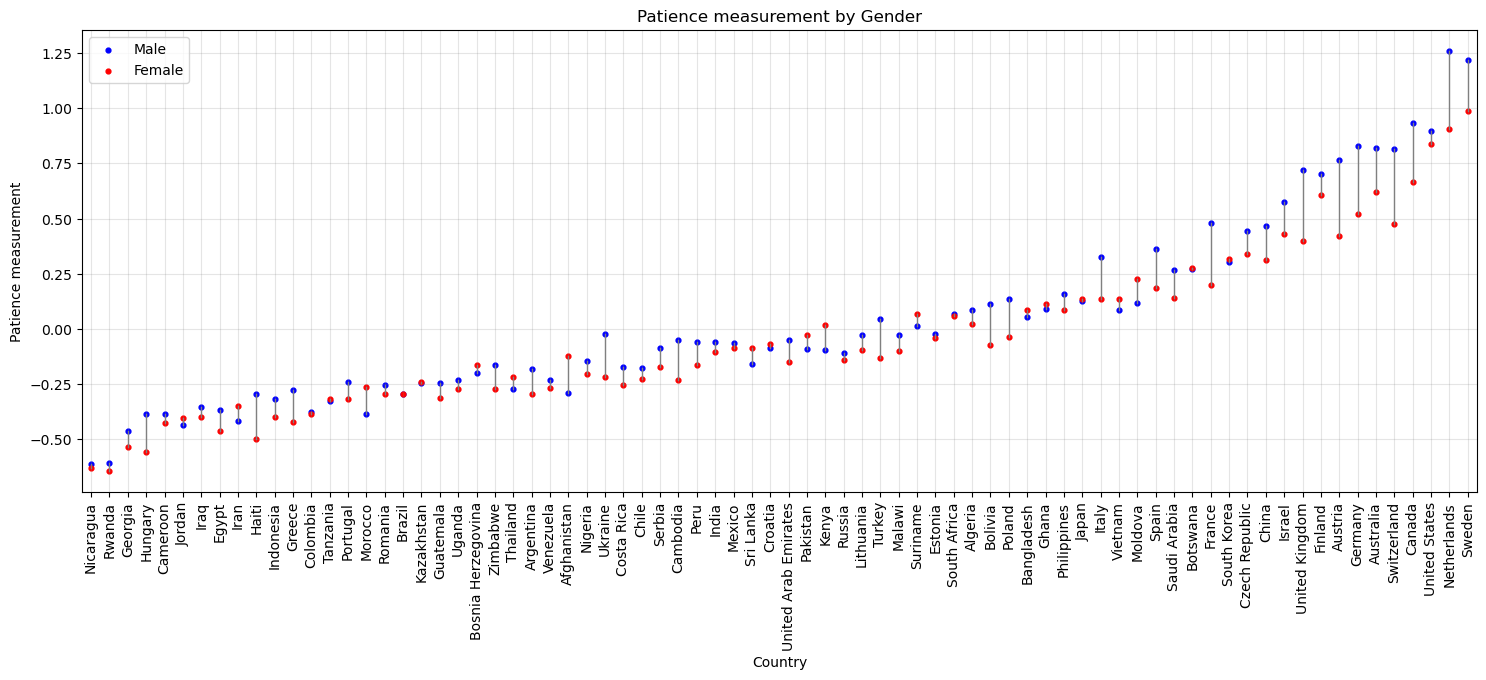

In [17]:
plt.figure(figsize=(18,6))
plt.scatter(combined['country'], combined['patience_male'], color='blue', marker='o', label='Male', s=12)
plt.scatter(combined['country'], combined['patience_female'], color='red', marker='o', label='Female', s=12)

for country in combined['country'].unique():
    male_patience = combined[combined['country'] == country]['patience_male'].values
    female_patience = combined[combined['country'] == country]['patience_female'].values
    if male_patience.size > 0 and female_patience.size > 0:
        plt.plot([country, country], [male_patience[0], female_patience[0]], color='gray', linestyle='-', linewidth=1)

plt.xlabel('Country')
plt.ylabel('Patience measurement')
plt.title('Patience measurement by Gender')
plt.legend()
plt.xticks(rotation=90)
plt.xlim(-0.5, len(combined['country'].unique()) - 0.5)
plt.grid(True, linestyle='-', color='gray', alpha=0.2)
plt.show()
#countries ordered by mean patience of males and females by country

In [18]:
combined[['patience_male', 'patience_female']].describe().drop(['count', '25%', '50%', '75%'])


,patience_male,patience_female
mean,0.0417,-0.0352
std,0.4195,0.3588
min,-0.6111,-0.6432
max,1.2600,0.9881


In [19]:
combined_ranks['mean'] = (combined_ranks['patience_rank_male'] + combined_ranks['patience_rank_female']) / 2
combined_ranks = combined_ranks.sort_values(by='mean').reset_index(drop=True)
combined_ranks

,country,patience_rank_female,patience_rank_male,patience_rank,mean
0,Netherlands,2.0000,1.0000,75.0000,1.5000
1,Sweden,1.0000,2.0000,76.0000,1.5000
2,United States,3.0000,4.0000,74.0000,3.5000
3,Canada,4.0000,3.0000,73.0000,3.5000
4,Australia,5.0000,6.0000,71.0000,5.5000
...,...,...,...,...,...
71,Jordan,68.0000,73.0000,6.0000,70.5000
72,Hungary,74.0000,69.0000,4.0000,71.5000
73,Georgia,73.0000,74.0000,3.0000,73.5000
74,Rwanda,76.0000,75.0000,2.0000,75.5000


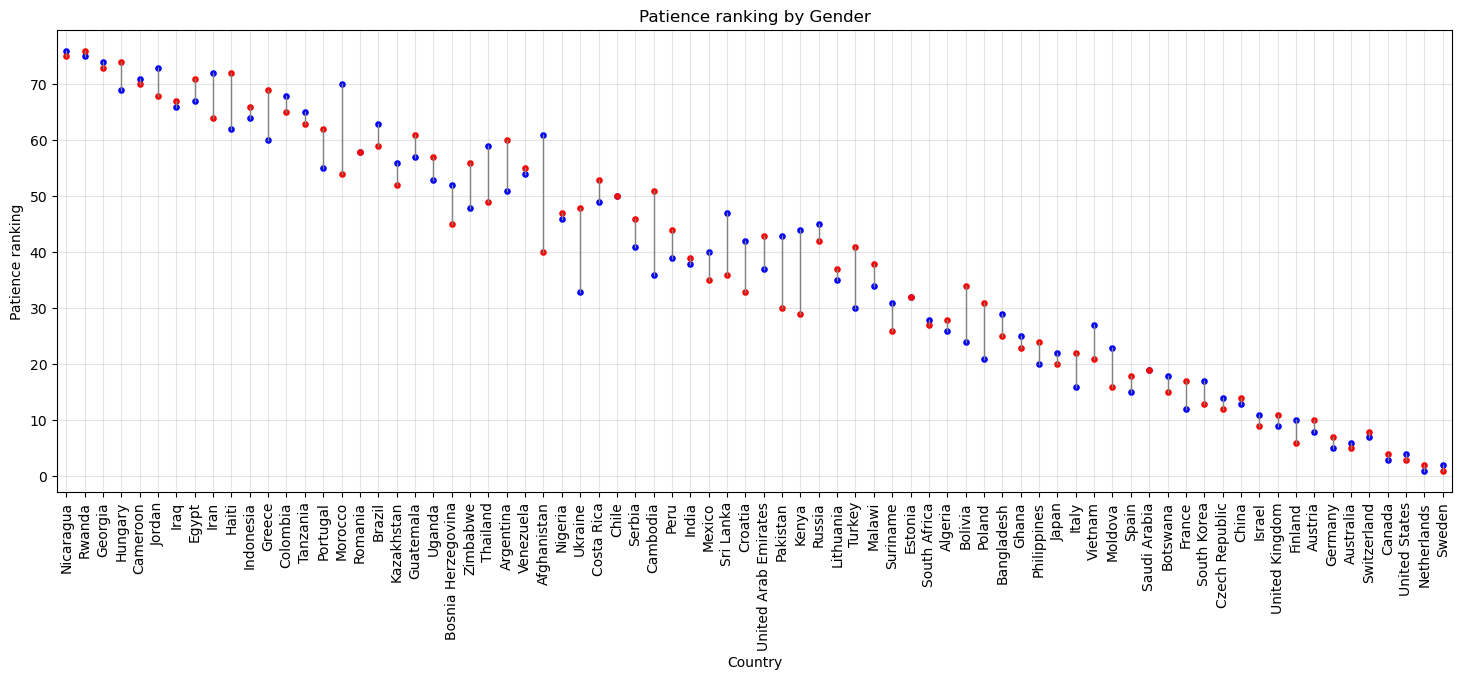

In [20]:
combined_ranks_sorted = combined_ranks.sort_values(by='patience_rank', ascending=True)

plt.figure(figsize=(18, 6))
scatter_male = plt.scatter(combined_ranks_sorted['country'], combined_ranks_sorted['patience_rank_male'], color='blue', marker='o', label='Male', s=14)
scatter_female = plt.scatter(combined_ranks_sorted['country'], combined_ranks_sorted['patience_rank_female'], color='red', marker='o', label='Female', s=14)

for country in combined_ranks_sorted['country'].unique():
    male_rank = combined_ranks_sorted[combined_ranks_sorted['country'] == country]['patience_rank_male'].values
    female_rank = combined_ranks_sorted[combined_ranks_sorted['country'] == country]['patience_rank_female'].values
    if male_rank.size > 0 and female_rank.size > 0:
        plt.plot([country, country], [male_rank[0], female_rank[0]], color='gray', linestyle='-', linewidth=1)

plt.xlabel('Country')
plt.ylabel('Patience ranking')
plt.title('Patience ranking by Gender')


plt.xticks(rotation=90)
plt.xlim(-0.5, len(combined_ranks['country'].unique()) - 0.5)
plt.grid(True, linestyle='-', color='gray', alpha=0.2)
plt.show()
